In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pose_tensorflow
# from pose_tensorflow.util import visualize
# import matplotlib.pyplot as plt
from skimage.transform import resize as imresize
from imageio import imread, imwrite
from pose_tensorflow.draw import draw_annotations, find_coords
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def make_smaller_png(img_file, output_file, max_dim=640):
    image = imread(image_file)
    factor = max(image.shape) // max_dim
    smaller_image = imresize(image, (image.shape[0] // factor, image.shape[1] // factor))
    imwrite(output_file, smaller_image)

    

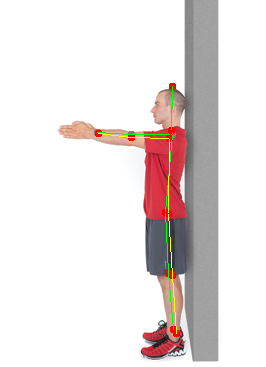

In [22]:
# image_file = "demo/image.png"
image_file = "/home/venky/Downloads/Standing-Shoulder-Flexion-1.png"
image = imread(image_file)
pose = pose_tensorflow.process_single_image(image_file)
draw_annotations(image_file, pose, confidence_threshold=0.75)

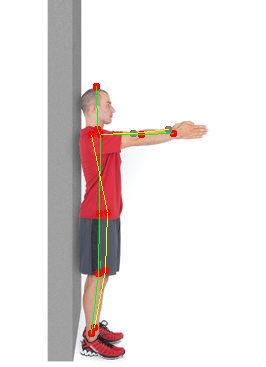

In [6]:
image_file = "/home/venky/Downloads/Standing-Shoulder-Flexion-1-flipped.png"
image = imread(image_file)
pose = pose_tensorflow.process_single_image(image_file)
draw_annotations(image_file, pose, confidence_threshold=0.75)

In [19]:
def euclidean_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def joint_length(pose, j1, j2, side):
    p1 = find_coords(pose, j1, side)
    p2 = find_coords(pose, j2, side)
    return euclidean_distance(p1, p2)

def joint_angle(pose, j1, j2, j3, side):
    """
    We'll use the cosine rule
    c^2 = a^2 + b^2 - 2ab cos C
    
    We want the angle between (j1, j2) and (j2, j3)

    c = j1-j3
    a = j1-j2
    b = j2-j3

    """
    a = joint_length(pose, j1, j2, side)
    b = joint_length(pose, j2, j3, side)
    c = joint_length(pose, j1, j3, side)
    return np.degrees(np.arccos((a**2 + b**2 - c**2)/(2 * a * b)))
    
    

In [24]:
joint_angle(pose, 'elbow', 'shoulder', 'hip', side=1)

89.18310004776615

- 14 joints
- 2 sides

pose_json is a 14 element array
scmap is a strodey * strodex * 14 tensor
locref is strodey * strodex  * 14 * 2
pose is 14 * (curx, cury, prob)?


where strode* is the dimension under stride (but this doesn't quite fit for the x-dim)